In [1]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nightengale_metadata = pd.read_excel("data/264079_file03.xlsx", engine="openpyxl", sheet_name="Table S1", skiprows=2)
nightengale_metadata = nightengale_metadata.drop(columns=["Biomarker", "Units", "Group", "Sub-group", "UKB Field ID", "QC Flag Field ID"])
nightengale_metadata = nightengale_metadata.rename(columns={"Description": "BIOCHEMICAL"})
annotations = pd.read_excel("data/BioBank.xlsx", engine="openpyxl", sheet_name="Metabolite Annotations")
annotations = annotations.merge(nightengale_metadata, on="BIOCHEMICAL", how="left")
is_nonderived = (annotations['Type'] == "Non-derived").values.tolist()

train_df = pd.read_excel("data/BioBank.xlsx", engine="openpyxl", sheet_name="Training Set")
test_df = pd.read_excel("data/BioBank.xlsx", engine="openpyxl", sheet_name="Testing Set")
df = pd.concat([train_df, test_df])
del train_df
del test_df
del nightengale_metadata

C:\Users\austi\anaconda3\envs\mtProt2\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1500x1000 with 0 Axes>

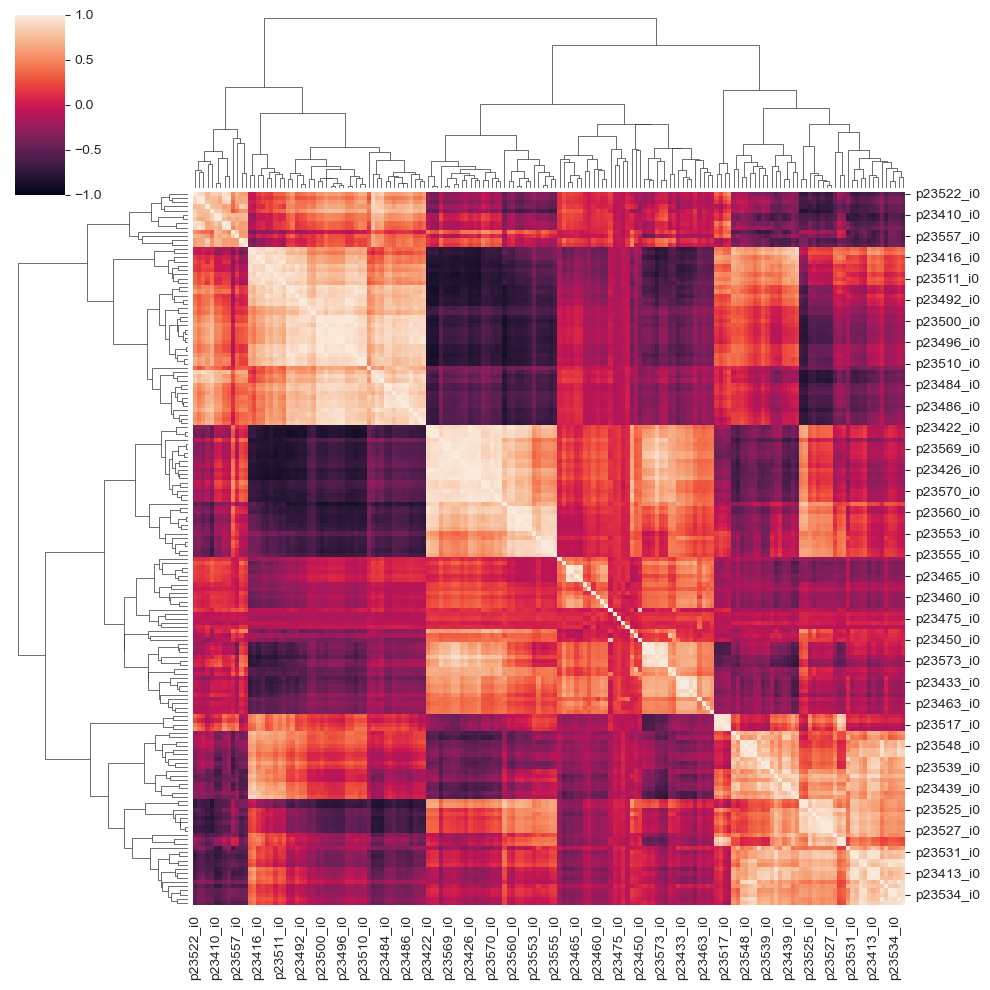

In [3]:
plt.figure(figsize=(15, 10))
sns.clustermap(df.corr(), annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

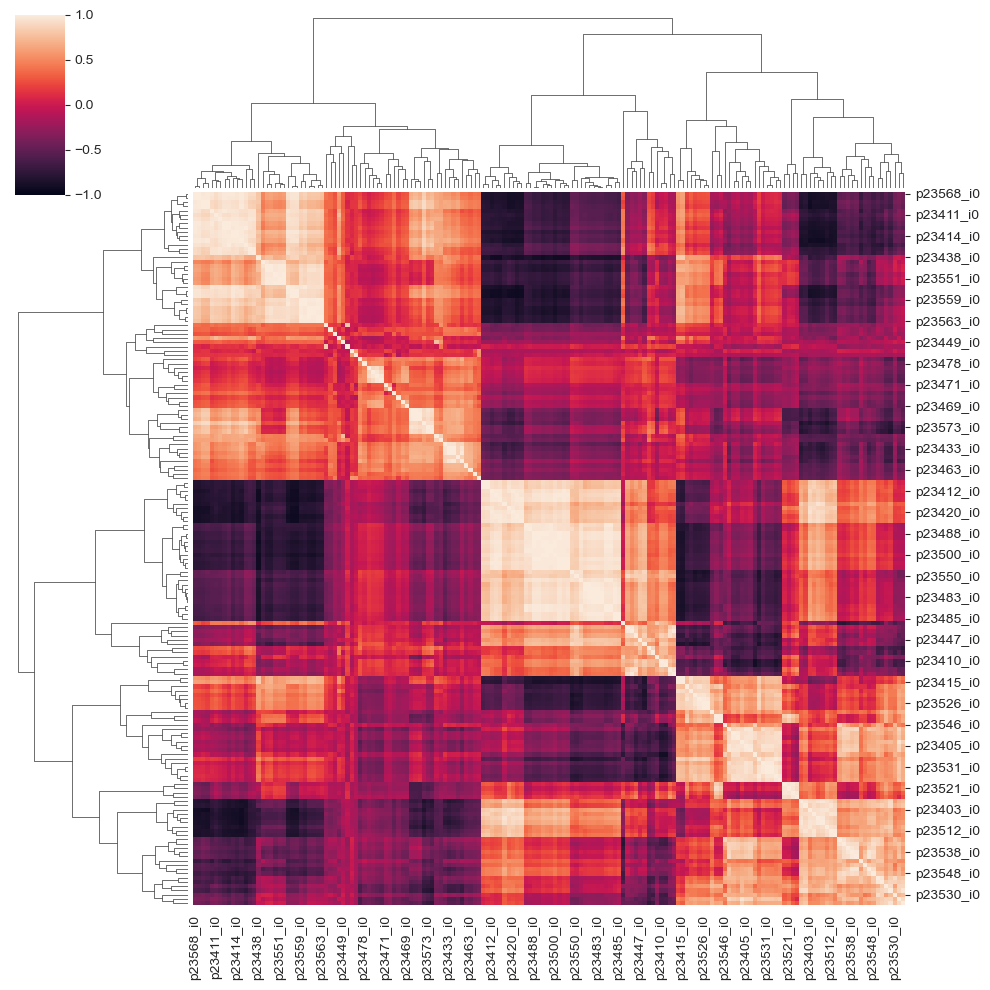

In [4]:
plt.figure(figsize=(15, 10))
sns.clustermap(df.corr('spearman'), annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

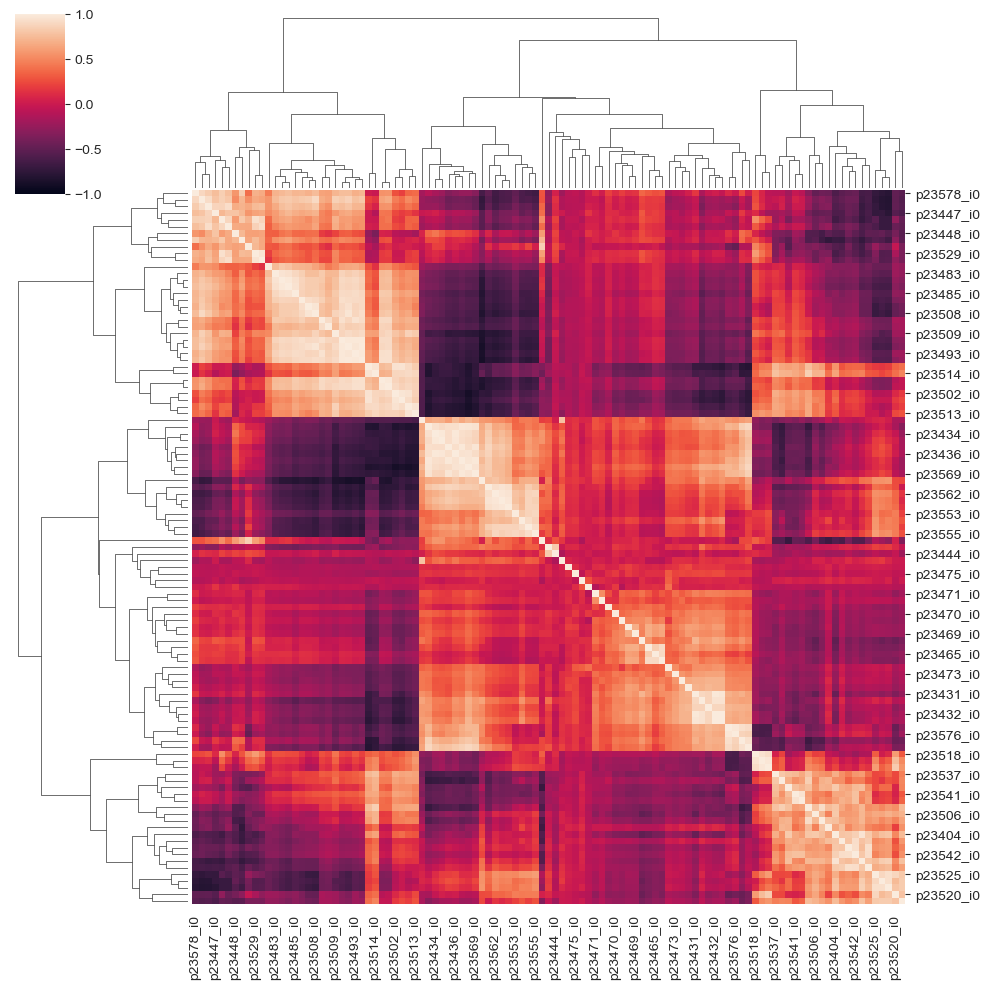

In [5]:
# Correlate without derived features
non_derived_df = df[df.columns[is_nonderived]]
plt.figure(figsize=(15, 10))
sns.clustermap(non_derived_df.corr(), annot=False, vmin=-1, vmax=1)

<Figure size 1500x1000 with 0 Axes>

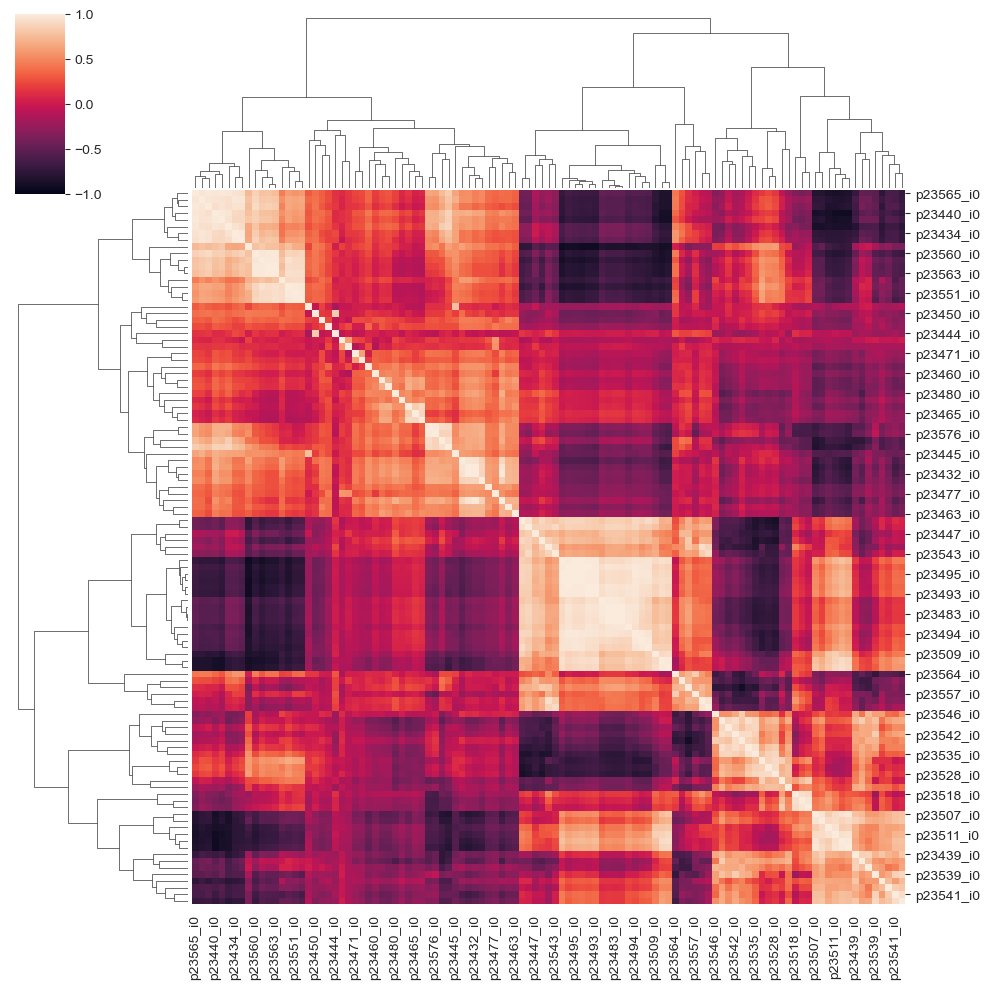

In [6]:
plt.figure(figsize=(15, 10))
sns.clustermap(non_derived_df.corr('spearman'), annot=False, vmin=-1, vmax=1)